In [112]:
# Task 1

import re

# SLI & TD transcripts


file = open('TD-10.txt', "r")
file1 = file.read()
file1 = file1.replace("\n\t", "")
file2 = file1.split("\n")

statements = []
for items in file2:
    if "*CHI:" in items:
        statements.append(items[6:])


def filtering(statements):
    cleaned_statements = []
    keep = ["[/]", "[//]", "[* m:+ed]"]
    for parts in statements:
        target = re.findall(r"\[.*?\]", parts)
        for eye in target:
            if eye not in keep:
                parts = parts.replace(eye, "")
        cleaned_statements.append(parts)
    # print(cleaned_statements)       # correct cleaned list

    square_less = []
    for line in cleaned_statements:
        if "<" in line:
            line = line.replace("<", "")
        if ">" in line:
            line = line.replace(">", "")
        square_less.append(line)
    # print(square_less)


    plus_and_list = []
    for token in square_less:
        # print(token)
        match1 = re.findall(r"\A\+.*?\S+", token)
        match2 = re.findall(r"\A\&.*?\S+", token)
        for occurrence in match1:
            # print(occurrence)
            if occurrence in token:
                token = token.replace(occurrence, "")
        for occurrence in match2:
            if occurrence in token:
                token = token.replace(occurrence, "")
        plus_and_list.append(token)
    # print(plus_and_list)    # list cleared of '&' and '+'

    word_bracketfree = []
    for brackets in plus_and_list:
        open_bracket = re.findall(r"\(\w+", brackets)
        closed_bracket = re.findall(r"\w+\)", brackets)
        for word in open_bracket:
            if "(" in word:
                brackets = brackets.replace("(", "")
        for word in closed_bracket:
            if ")" in word:
                brackets = brackets.replace(")", "")
        word_bracketfree.append(brackets)
    return [lines for lines in word_bracketfree]
        

#     [print(lines) for lines in word_bracketfree]



file.close()



In [113]:
filtered_file = filtering(statements[0])
print(filtered_file)

['o', 'n', 'e', ' ', 'd', 'a', 'y', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'w', 'a', 's', ' ', 'a', 'n', ' ', 'e', 'l', 'e', 'p', 'h', 'a', 'n', 't', ' ', 'a', 'n', 'd', ' ', 'a', ' ', 'g', 'i', 'r', 'a', 'f', 'f', 'e', ' ', '.']


In [21]:
# Task 2
import re
import pandas as pd

# Task 2: Building a Class for Data Analysis

class Analyser:
    def __init__(self):
        self.length_of_transcript = 0       # number of statements, end of a statement indicated by '.', '?' and '!'
        self.num_unique = 0         # number of unique words
        self.rep1slash = 0          # repetition of [/]
        self.rep2slash = 0          # repetition of [//]
        self.rep_sq_star = 0        # repetition of [* m:+ed]
        self.num_pauses = 0         # number of (.)
        self.stat_list_sli = []
        self.stat_list_td = []
        
        
    # This is the function that analyses and counts the different statistics for the SLI cleaned files
    def sli_analyse_script(self, cleaned_file=""):
        file = open(cleaned_file, "r")
        file1 = file.read()

        # number of unique words
        if cleaned_file[0] == "s":
            unique_words = file1
            for words in unique_words:
                target = re.findall(r"[^a-zA-Z]", words)
                if words in target:
                    words.replace(words, "")
            unique_words = unique_words.split(" ")
            self.num_unique = len(set(unique_words))
            self.stat_list_sli.append(self.num_unique)

            # length of transcripts count
            self.length_of_transcript = int(file1.count(".")) + int(file1.count("?")) + int(file1.count("!"))
            self.stat_list_sli.append(self.length_of_transcript)

            # count of [/]
            self.rep1slash = file1.count("[/]")
            self.stat_list_sli.append(self.rep1slash)

            # count of [//]
            self.rep2slash = file1.count("[//]")
            self.stat_list_sli.append(self.rep2slash)

            # count of [* m:+ed]
            self.rep_sq_star = file1.count("[* m:+ed]")
            self.stat_list_sli.append(self.rep_sq_star)

            # count of (.)
            self.num_pauses = file1.count("(.)")
            self.stat_list_sli.append(self.num_pauses)
            
        # combining stats in a single sli list
        return self.stat_list_sli 
            
            
    # This is the function that analyses and counts the different statistics for the TD cleaned files
    def td_analyse_script(self, cleaned_file=""):
        file = open(cleaned_file, "r")
        file1 = file.read()
        
        # number of unique words
        if cleaned_file[0] == "t":
            unique_words = file1
            for words in unique_words:
                target = re.findall(r"[^a-zA-Z]", words)
                if words in target:
                    words.replace(words, "")
            unique_words = unique_words.split(" ")
            self.num_unique = len(set(unique_words))
            self.stat_list_td.append(self.num_unique)
        
            # length of transcripts count
            self.length_of_transcript = int(file1.count(".")) + int(file1.count("?")) + int(file1.count("!"))
            self.stat_list_td.append(self.length_of_transcript)

            # count of [/]
            self.rep1slash = file1.count("[/]")
            self.stat_list_td.append(self.rep1slash)

            # count of [//]
            self.rep2slash = file1.count("[//]")
            self.stat_list_td.append(self.rep2slash)

            # count of [* m:+ed]
            self.rep_sq_star = file1.count("[* m:+ed]")
            self.stat_list_td.append(self.rep_sq_star)

            # count of (.)
            self.num_pauses = file1.count("(.)")
            self.stat_list_td.append(self.num_pauses)
            
        # combining stats in a single td list
        return self.stat_list_td              
        

    def __str__(self):
        return str(self.length_of_transcript), "statements", "\n", str(self.num_unique), "unique words", "\n", \
        str(self.rep1slash), "repetitions", "\n", str(self.rep2slash), "retraces", "\n", \
        str(self.rep_sq_star), "grammatical errors", "\n", str(self.num_pauses), "pauses"
            
        
a1 = Analyser()
sli = a1.sli_analyse_script("sli1_cleaned.txt")
sli = a1.sli_analyse_script("sli2_cleaned.txt")
sli = a1.sli_analyse_script("sli3_cleaned.txt")
sli = a1.sli_analyse_script("sli4_cleaned.txt")
sli = a1.sli_analyse_script("sli5_cleaned.txt")
sli = a1.sli_analyse_script("sli6_cleaned.txt")
sli = a1.sli_analyse_script("sli7_cleaned.txt")
sli = a1.sli_analyse_script("sli8_cleaned.txt")
sli = a1.sli_analyse_script("sli9_cleaned.txt")
sli = a1.sli_analyse_script("sli10_cleaned.txt")

sli_stats = []
sli_lot = sli[::6]
sli_stats.append(sli_lot)

sli_uw = sli[1::6]
sli_stats.append(sli_uw)

sli_repw = sli[2::6]
sli_stats.append(sli_repw)

sli_retw = sli[3::6]
sli_stats.append(sli_retw)

sli_ge = sli[4::6]
sli_stats.append(sli_ge)

sli_np = sli[5::6]
sli_stats.append(sli_np)

sli_data = pd.DataFrame(sli_stats)
sli_data = sli_data.transpose()
sli_data.columns = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
sli_data.index = ['SLI1', 'SLI2', 'SLI3', 'SLI4', 'SLI5', 'SLI6', 'SLI7', 'SLI8', 'SLI9', 'SLI10']

td = a1.td_analyse_script("td1_cleaned.txt")
td = a1.td_analyse_script("td2_cleaned.txt")
td = a1.td_analyse_script("td3_cleaned.txt")
td = a1.td_analyse_script("td4_cleaned.txt")
td = a1.td_analyse_script("td5_cleaned.txt")
td = a1.td_analyse_script("td6_cleaned.txt")
td = a1.td_analyse_script("td7_cleaned.txt")
td = a1.td_analyse_script("td8_cleaned.txt")
td = a1.td_analyse_script("td9_cleaned.txt")
td = a1.td_analyse_script("td10_cleaned.txt")

td_stats = []
td_lot = td[::6]
td_stats.append(td_lot)

td_uw = td[1::6]
td_stats.append(td_uw)

td_repw = td[2::6]
td_stats.append(td_repw)

td_retw = td[3::6]
td_stats.append(td_retw)

td_ge = td[4::6]
td_stats.append(td_ge)

td_np = td[5::6]
td_stats.append(td_np)

td_data = pd.DataFrame(td_stats)
td_data = td_data.transpose()
td_data.columns = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
td_data.index = ['TD1', 'TD2', 'TD3', 'TD4', 'TD5', 'TD6', 'TD7', 'TD8', 'TD9', 'TD10']


None


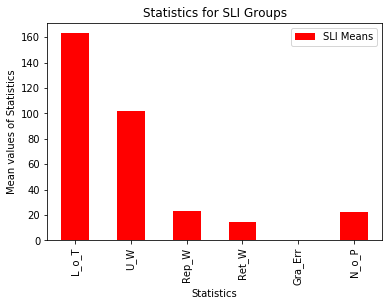

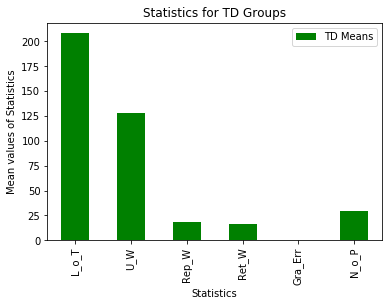

In [80]:
# Task 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import task2

# Visualisation of gathered statistics

class Visualisation:
    
    def __init__(self, data):
        self.data = data # indices 0 to 5 of this dataset belong to sli and indices 6 to 11 is for td
        self.mean = [] # relating to the 

    def compute_averages(self):
        for average in self.data:
            self.mean.append(np.mean(average))
            
        df = pd.DataFrame(self.mean[0:6])
        df.columns = ['SLI Means']
        df.index = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
        print(df)
        
        df1 = pd.DataFrame(self.mean[6:12])
        df1.index = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
        df1.columns = ['TD Means']
        print(df1)

    def visualise_statistics(self):
        
        for average in self.data:
            self.mean.append(np.mean(average))
            
        df = pd.DataFrame(self.mean[0:6])
        df.index = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
        df.columns = ['SLI Means']
        ax = df.plot(kind="bar", title="Statistics for SLI Groups", color="r")
        ax.set_xlabel('Statistics')
        ax.set_ylabel('Mean values of Statistics')
        
        
        df1 = pd.DataFrame(self.mean[6:12])
        df1.index = ["L_o_T", "U_W", "Rep_W", "Ret_W", "Gra_Err", "N_o_P"]
        df1.columns = ['TD Means']        
        ax1 = df1.plot(kind="bar", title="Statistics for TD Groups", color='g')
        ax1.set_xlabel('Statistics')
        ax1.set_ylabel('Mean values of Statistics')        
        

data = sli_stats + td_stats
v1 = Visualisation(data)
# print(v1.compute_averages())
print(v1.visualise_statistics())
        
